<a href="https://colab.research.google.com/github/Shivansh1969/TEMP-rainfall-detection/blob/main/EDA_TEMP_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) for Temperature Prediction

In this phase, we will explore the Bangalore temperature dataset to understand its structure, identify patterns, and uncover relationships between different weather variables. This analysis is crucial for preparing the data for our LSTM model.

# Step 1: Load and Inspect the Data
First, we need to load the dataset and perform a quick inspection. This helps us verify that the file is read correctly and allows us to see the column names, the number of entries, and their data types.


In [1]:
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Bangalore_TEMP-prediction_final.csv')

In [3]:
df.head()

,date,lat,lon,temp,humidity_min,humidity_max,pressure_min,pressure_max
0,4/12/2000,12.5,77.5,35.75,37.0,90.000000,949.293798,949.300000
1,4/13/2000,12.5,77.5,35.83,43.0,96.000000,949.275194,949.293023
2,4/14/2000,12.5,77.5,35.90,56.0,92.333333,949.256589,949.274419
3,4/15/2000,12.5,77.5,35.13,50.0,93.000000,949.237985,949.255814
4,4/16/2000,12.5,77.5,35.45,63.0,96.000000,949.219380,949.237209


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8664 entries, 0 to 8663
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          8664 non-null   object 
 1   lat           8664 non-null   float64
 2   lon           8664 non-null   float64
 3   temp          8664 non-null   float64
 4   humidity_min  8664 non-null   float64
 5   humidity_max  8664 non-null   float64
 6   pressure_min  8664 non-null   float64
 7   pressure_max  8664 non-null   float64
dtypes: float64(7), object(1)
memory usage: 541.6+ KB


# Step 2: Data Cleaning and Preparation

Before we can create meaningful graphs, we need to handle the date column. Currently, it's just text. We need to convert it into a proper datetime format so that our program understands it as a timeline. We will also set this column as the index of our data, which is a standard and very useful practice for time-series analysis.


In [5]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df.set_index('date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8664 entries, 2000-04-12 to 2023-12-31
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lat           8664 non-null   float64
 1   lon           8664 non-null   float64
 2   temp          8664 non-null   float64
 3   humidity_min  8664 non-null   float64
 4   humidity_max  8664 non-null   float64
 5   pressure_min  8664 non-null   float64
 6   pressure_max  8664 non-null   float64
dtypes: float64(7)
memory usage: 541.5 KB


In [6]:
df.head()

,lat,lon,temp,humidity_min,humidity_max,pressure_min,pressure_max
date,,,,,,,
2000-04-12,12.5,77.5,35.75,37.0,90.000000,949.293798,949.300000
2000-04-13,12.5,77.5,35.83,43.0,96.000000,949.275194,949.293023
2000-04-14,12.5,77.5,35.90,56.0,92.333333,949.256589,949.274419
2000-04-15,12.5,77.5,35.13,50.0,93.000000,949.237985,949.255814
2000-04-16,12.5,77.5,35.45,63.0,96.000000,949.219380,949.237209


dropping lat and lon columns as they only had significance during the data acquisition step for pin pointing bangalore

In [13]:
df.drop(['lat','lon'],axis=1,inplace=True)

KeyError: "['lat', 'lon'] not found in axis"

In [14]:
df.head()

,temp,humidity_min,humidity_max,pressure_min,pressure_max
date,,,,,
2000-04-12,35.75,37.0,90.000000,949.293798,949.300000
2000-04-13,35.83,43.0,96.000000,949.275194,949.293023
2000-04-14,35.90,56.0,92.333333,949.256589,949.274419
2000-04-15,35.13,50.0,93.000000,949.237985,949.255814
2000-04-16,35.45,63.0,96.000000,949.219380,949.237209


Now for our first visualization. We will create a line chart showing the average daily temperature across the entire time period of our dataset. This is one of the most important plots in a time-series analysis. It allows us to see the bigger picture, helping us to visually identify long-term trends, seasonal cycles, and any unusual periods or outliers in the data.



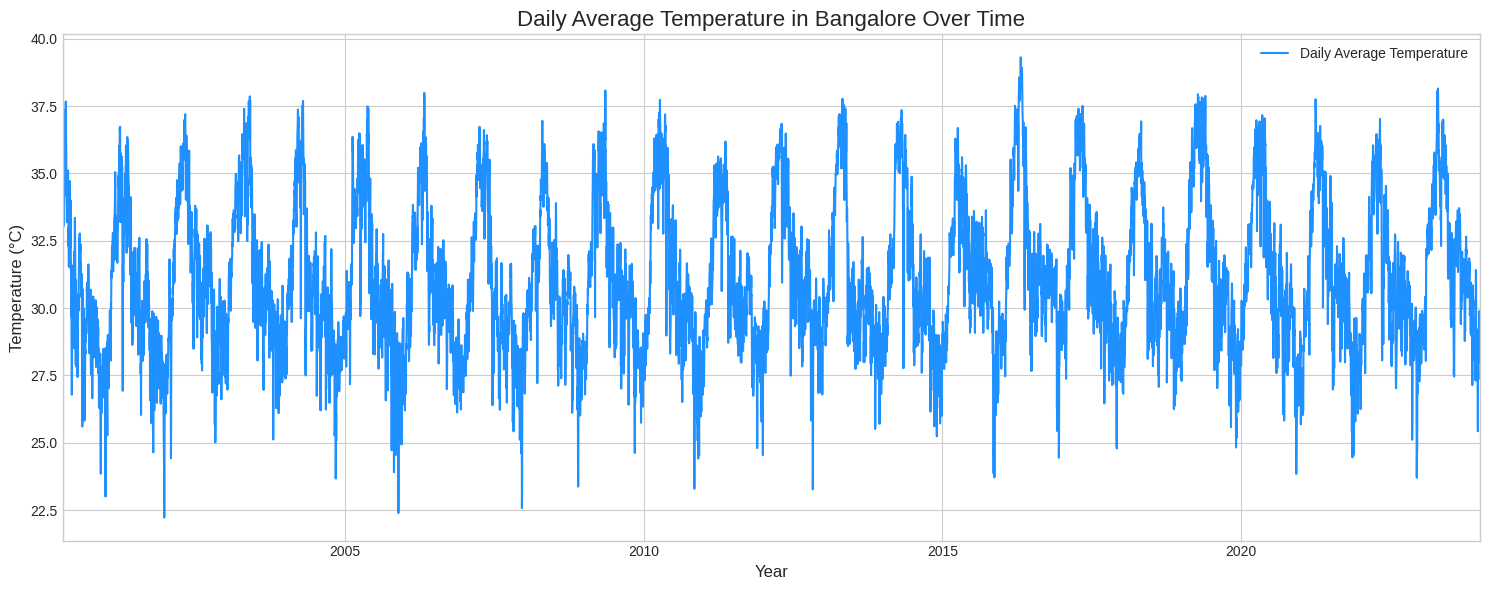

In [16]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 6))

df['temp'].plot(label='Daily Average Temperature', color='dodgerblue')

plt.title('Daily Average Temperature in Bangalore Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend()


plt.tight_layout()
plt.show()


While the previous chart showed us the long-term trend, it had a lot of daily "noise" or fluctuation. To get a clearer view of the seasonal patterns, we can smooth this out by resampling our data.

/tmp/ipython-input-3103581478.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_temp = df['temp'].resample('M').mean()


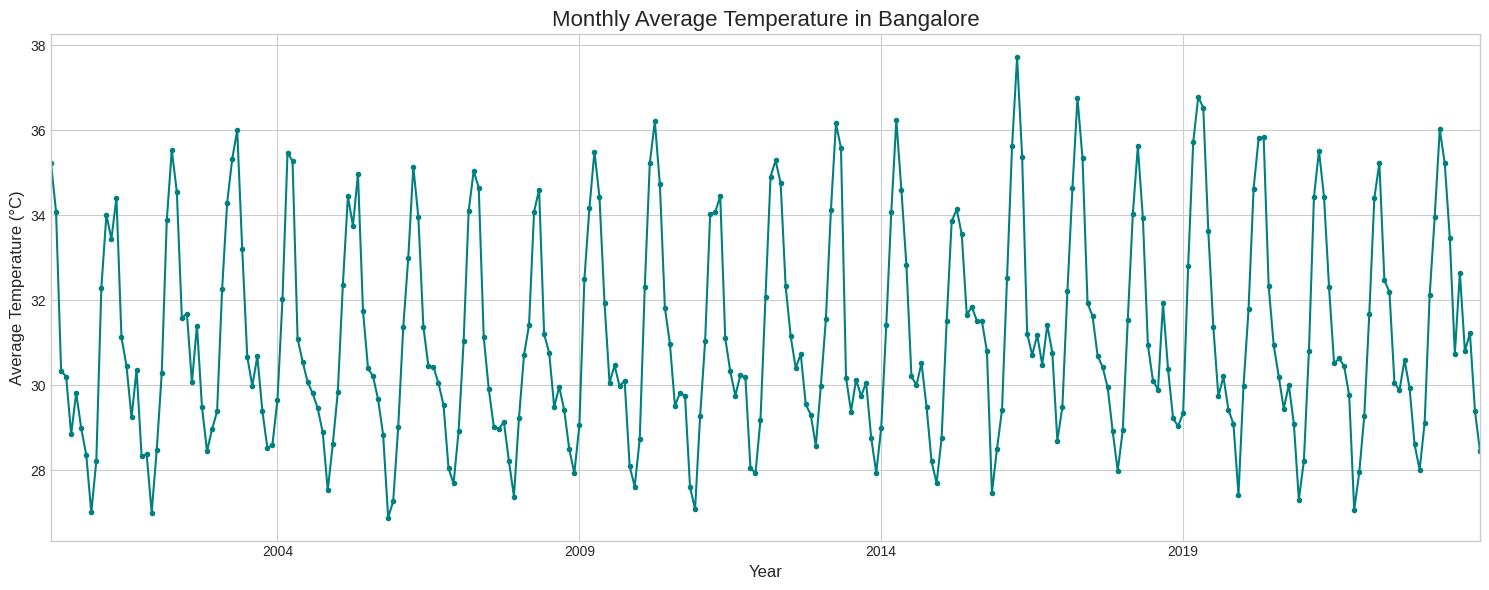

In [17]:
monthly_avg_temp = df['temp'].resample('M').mean()

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 6))
monthly_avg_temp.plot(color='teal', marker='.', linestyle='-')
plt.title('Monthly Average Temperature in Bangalore', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.tight_layout()
plt.show()

Next, let's understand the distribution of the temperature data. A histogram is the perfect tool for this. It groups temperatures into ranges and shows us how many days fall into each range. This helps us see what temperature range is most common in Bangalore and whether the data is skewed towards hotter or colder temperatures.

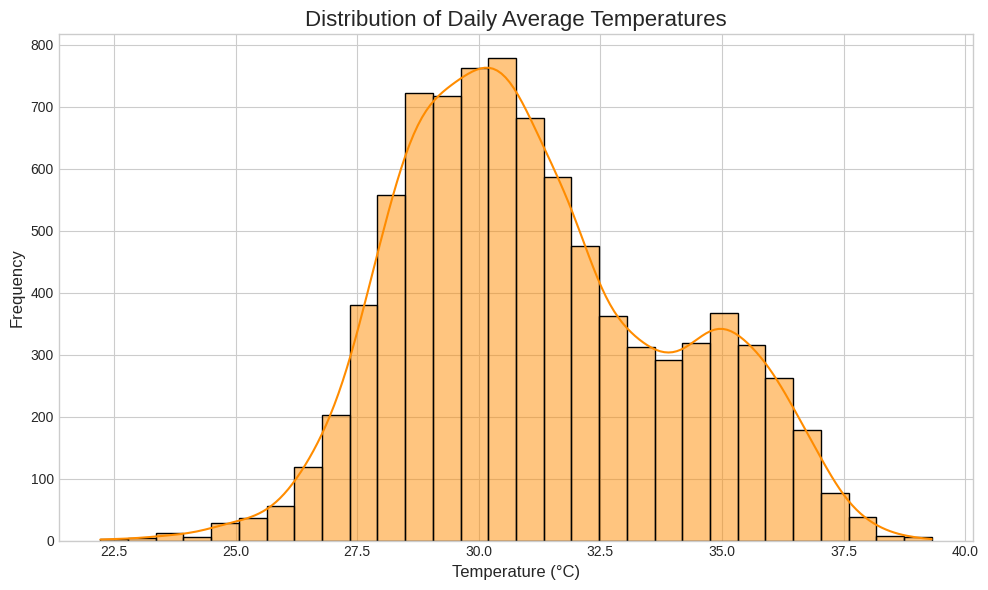

In [18]:
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

sns.histplot(df['temp'], bins=30, kde=True, color='darkorange')

plt.title('Distribution of Daily Average Temperatures', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


Now we'll make a correlation heat map to visually understand the relation between our target variable(TEMP) and predicton variables(press and humidity)

A value close to 1.0 (dark red) means a strong positive correlation. A value close to -1.0 (dark blue) means a strong negative correlation. Values near 0 indicate a weak relationship. This helps us spot important relationships, like how temperature might be linked to humidity or pressure.

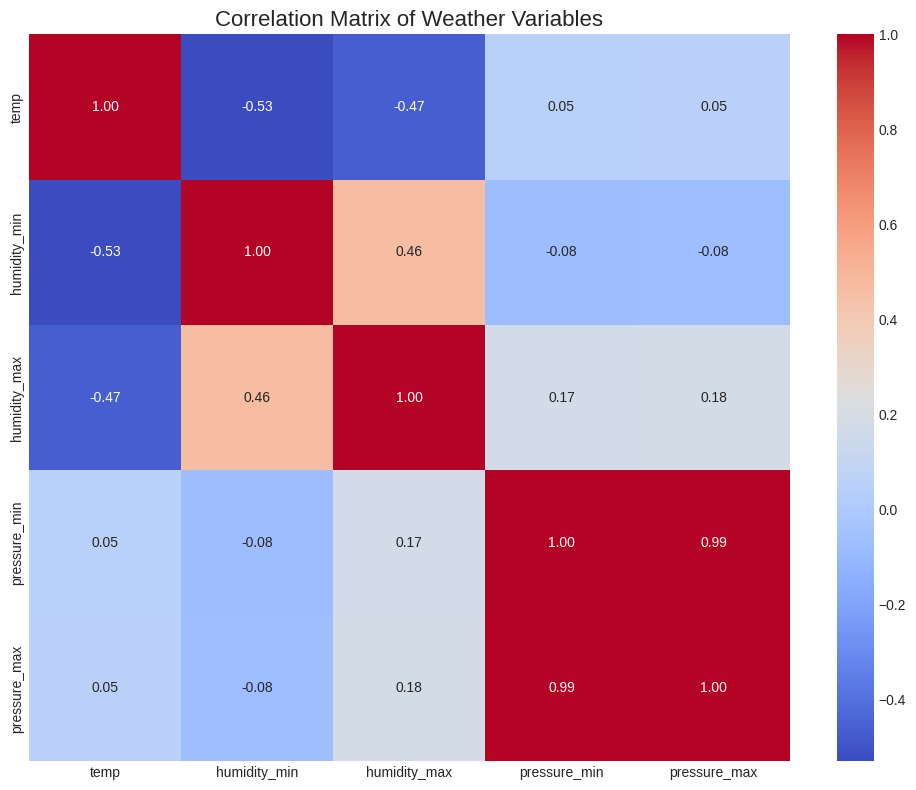

In [19]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 8))

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of Weather Variables', fontsize=16)
plt.tight_layout()
plt.show()

adding avg and range columns for humidity and pressure to help our model to better understand their trends, variations and identify any outliers

In [20]:
# 1. Calculate the average humidity and pressure
df['humidity_avg'] = (df['humidity_max'] + df['humidity_min']) / 2
df['pressure_avg'] = (df['pressure_max'] + df['pressure_min']) / 2

# 2. Calculate the daily range (difference) for humidity and pressure
df['humidity_range'] = df['humidity_max'] - df['humidity_min']
df['pressure_range'] = df['pressure_max'] - df['pressure_min']

In [21]:
df.head()

,temp,humidity_min,humidity_max,pressure_min,pressure_max,humidity_avg,pressure_avg,humidity_range,pressure_range
date,,,,,,,,,
2000-04-12,35.75,37.0,90.000000,949.293798,949.300000,63.500000,949.296899,53.000000,0.006202
2000-04-13,35.83,43.0,96.000000,949.275194,949.293023,69.500000,949.284109,53.000000,0.017829
2000-04-14,35.90,56.0,92.333333,949.256589,949.274419,74.166667,949.265504,36.333333,0.017829
2000-04-15,35.13,50.0,93.000000,949.237985,949.255814,71.500000,949.246899,43.000000,0.017829
2000-04-16,35.45,63.0,96.000000,949.219380,949.237209,79.500000,949.228295,33.000000,0.017830


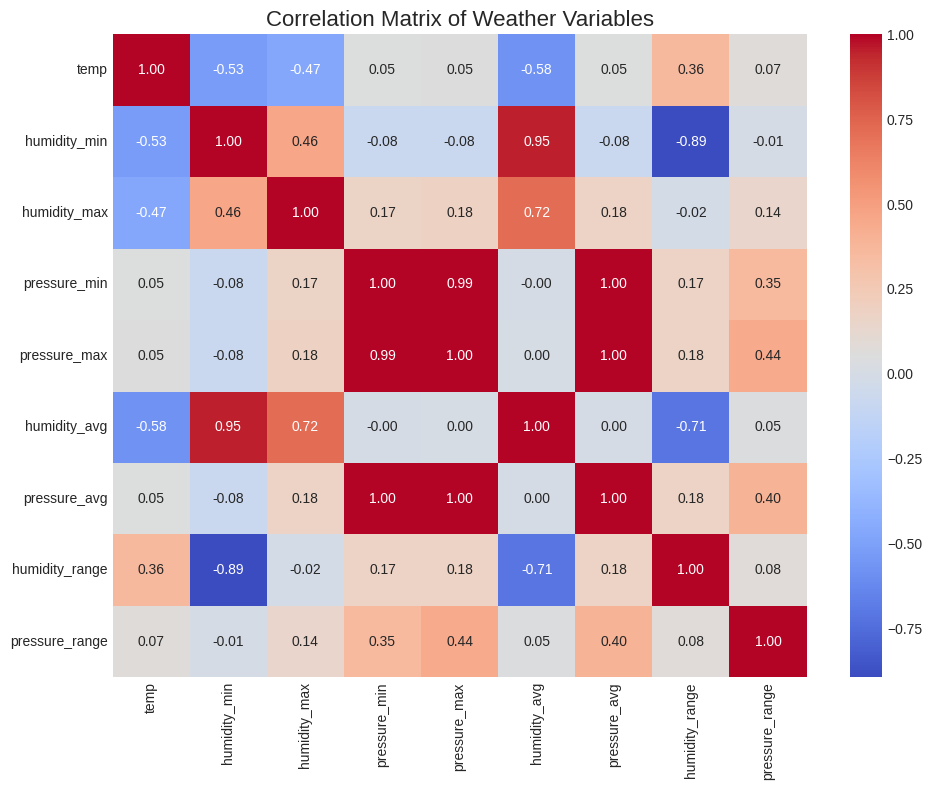

In [22]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 8))

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of Weather Variables', fontsize=16)
plt.tight_layout()
plt.show()

as we can see that all pressure columns have very low correlation with temp it we should drop them as they'll not be able to contribute much for temp prediction

In [23]:
df.drop(['pressure_min','pressure_max','pressure_range','pressure_avg'],inplace=True,axis=1)

In [24]:
df.head()

,temp,humidity_min,humidity_max,humidity_avg,humidity_range
date,,,,,
2000-04-12,35.75,37.0,90.000000,63.500000,53.000000
2000-04-13,35.83,43.0,96.000000,69.500000,53.000000
2000-04-14,35.90,56.0,92.333333,74.166667,36.333333
2000-04-15,35.13,50.0,93.000000,71.500000,43.000000
2000-04-16,35.45,63.0,96.000000,79.500000,33.000000


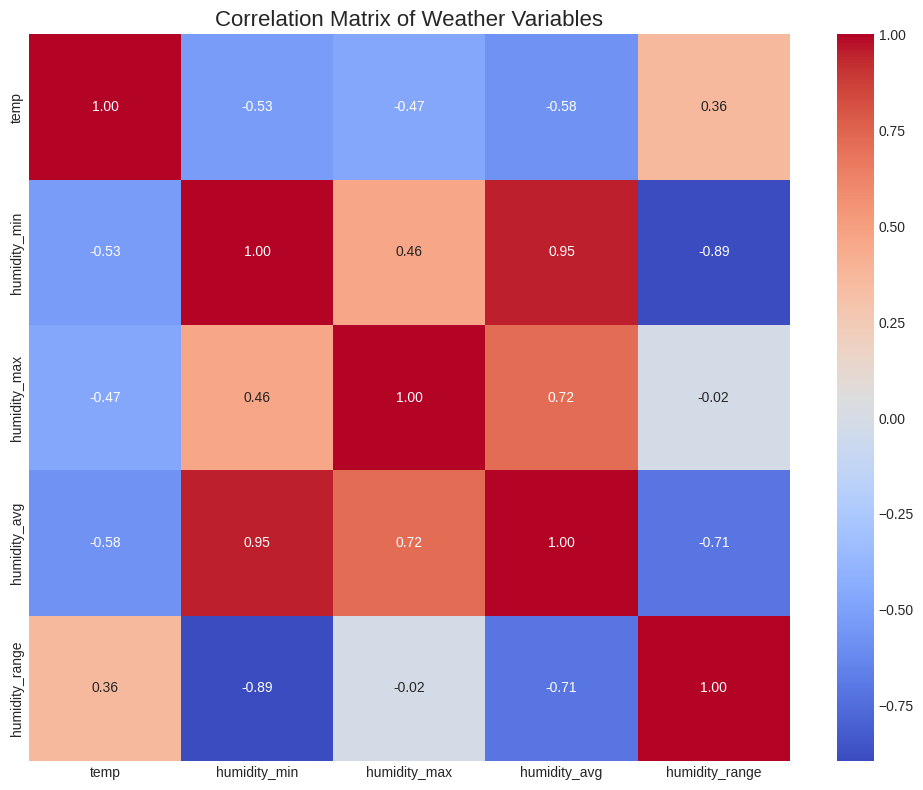

In [25]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 8))

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of Weather Variables', fontsize=16)
plt.tight_layout()
plt.show()